In [1]:
import pandas as pd
pd.set_option('display.max_rows', 100)
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
sns.set_style('ticks')
%matplotlib inline

## Clean Data

In [2]:

#call data
def get_data(week_nums):
    url = "http://web.mta.info/developers/data/nyct/turnstile/turnstile_{}.txt"
    dfs = []
    for week_num in week_nums:
        file_url = url.format(week_num)
        dfs.append(pd.read_csv(file_url, parse_dates=[['DATE','TIME']], keep_date_col=True))
    return pd.concat(dfs)
        
week_nums = [190406, 190413, 190420, 190427]  
#add these when we have more time: 190504, 190511, 190518, 190525, 190601, 190608, 190615, 190622, 190629

turnstiles_df = get_data(week_nums)


# strip column titles
turnstiles_df.columns = [column.strip() for column in turnstiles_df.columns]


# remove recover audits
turnstiles_df = turnstiles_df[turnstiles_df['DESC'] != 'RECOVR AUD']


# drop duplicates
turnstiles_df.drop_duplicates(subset=["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], inplace=True)


###################################################################################################################

## FRED'S CODE


# breaking up some stations since entrances are far apart and would count differently in this context
turnstiles_df.loc[(turnstiles_df['STATION'] == "34 ST-PENN STA") 
                   & (turnstiles_df["DIVISION"] == "IRT"), "STATION"] = "34 ST-PENN STA 7TH AVE"

turnstiles_df.loc[(turnstiles_df['STATION'] == "34 ST-PENN STA") 
                   & (turnstiles_df["DIVISION"] == "IND"), "STATION"] = "34 ST-PENN STA 8TH AVE"

turnstiles_df.loc[(turnstiles_df['STATION'] == "23 ST") 
                  & (turnstiles_df['LINENAME'] == '6') 
                  & (turnstiles_df["DIVISION"] == "IRT"), "STATION"] = "23 ST-LEX AVE"

turnstiles_df.loc[(turnstiles_df['STATION'] == "23 ST") 
                  & (turnstiles_df['LINENAME'] == 'CE') 
                  & (turnstiles_df["DIVISION"] == "IND"), "STATION"] = "23 ST-8TH AVE"

turnstiles_df.loc[(turnstiles_df['STATION'] == "23 ST") 
                  & (turnstiles_df['LINENAME'] == 'NRW') 
                  & (turnstiles_df["DIVISION"] == "BMT"), "STATION"] = "23 ST-BROADWAY"

turnstiles_df.loc[(turnstiles_df['STATION'] == "23 ST") 
                  & (turnstiles_df['LINENAME'] == 'FM') 
                  & (turnstiles_df["DIVISION"] == "IND"), "STATION"] = "23 ST-6TH AVE"

turnstiles_df.loc[(turnstiles_df['STATION'] == "23 ST") 
                  & (turnstiles_df['LINENAME'] == '1') 
                  & (turnstiles_df["DIVISION"] == "IRT"), "STATION"] = "23 ST-BRDWAY 7TH AVE"


###################################################################################################################

## LISA'S CODE


# more breaking up stations
turnstiles_df.loc[(turnstiles_df['STATION'] == "86 ST") 
                  & (turnstiles_df["DIVISION"] == "IND"), "STATION"] = "86 ST-8TH AVE"

turnstiles_df.loc[(turnstiles_df['STATION'] == "86 ST") 
                  & (turnstiles_df['LINENAME'] == '456') 
                  & (turnstiles_df["DIVISION"] == "IRT"), "STATION"] = "86 ST-LEXINGTON"

turnstiles_df.loc[(turnstiles_df['STATION'] == "86 ST") 
                  & (turnstiles_df['LINENAME'] == '1') 
                  & (turnstiles_df["DIVISION"] == "IRT"), "STATION"] = "86 ST-BROADWAY"

turnstiles_df.loc[(turnstiles_df['STATION'] == "86 ST") 
                  & (turnstiles_df['LINENAME'] == 'R') 
                  & (turnstiles_df["DIVISION"] == "BMT"), "STATION"] = "86 ST-4TH AVE"

turnstiles_df.loc[(turnstiles_df['STATION'] == "86 ST") 
                  & (turnstiles_df['LINENAME'] == 'N') 
                  & (turnstiles_df["DIVISION"] == "BMT"), "STATION"] = "86 ST-SEA BEACH"

turnstiles_df.loc[(turnstiles_df['STATION'] == "125 ST") 
                  & (turnstiles_df["DIVISION"] == "IND"), "STATION"] = "125 ST-8TH AVE"

turnstiles_df.loc[(turnstiles_df['STATION'] == "125 ST") 
                  & (turnstiles_df['LINENAME'] == '456') 
                  & (turnstiles_df["DIVISION"] == "IRT"), "STATION"] = "125 ST-LEXINGTON"

turnstiles_df.loc[(turnstiles_df['STATION'] == "125 ST") 
                  & (turnstiles_df['LINENAME'] == '1') 
                  & (turnstiles_df["DIVISION"] == "IRT"), "STATION"] = "125 ST-BROADWAY"

turnstiles_df.loc[(turnstiles_df['STATION'] == "125 ST") 
                  & (turnstiles_df['LINENAME'] == '23') 
                  & (turnstiles_df["DIVISION"] == "IRT"), "STATION"] = "125 ST-LENOX"


###################################################################################################################


# drop unneeded columns
turnstiles_df = turnstiles_df.drop(['LINENAME', 'DIVISION', 'DESC'], axis=1, errors="ignore")


turnstiles_df.head()


,DATE_TIME,C/A,UNIT,SCP,STATION,DATE,TIME,ENTRIES,EXITS
0,2019-03-30 00:00:00,A002,R051,02-00-00,59 ST,03/30/2019,00:00:00,6999064,2373568
1,2019-03-30 04:00:00,A002,R051,02-00-00,59 ST,03/30/2019,04:00:00,6999084,2373576
2,2019-03-30 08:00:00,A002,R051,02-00-00,59 ST,03/30/2019,08:00:00,6999107,2373622
3,2019-03-30 12:00:00,A002,R051,02-00-00,59 ST,03/30/2019,12:00:00,6999214,2373710
4,2019-03-30 16:00:00,A002,R051,02-00-00,59 ST,03/30/2019,16:00:00,6999451,2373781


In [3]:

# make a TIME columns as datetime objects
turnstiles_df['TIME'] = [dt.datetime.time(d) for d in turnstiles_df['DATE_TIME']]

turnstiles_df['TIME'].nunique()


30312

In [4]:


# function for changing times to be multiples of 4 and returning as strings
def shift_time(row):
    time = row['TIME']
    if (time >= dt.time(22,0) and time <= dt.time(23,59,59)) or (time >= dt.time(0,0) and time < dt.time(2,0)):
        return dt.time(0,0).strftime("%H:%M:%S")
    elif time >= dt.time(2,0) and time < dt.time(6,0):
        return dt.time(4,0).strftime("%H:%M:%S")
    elif time >= dt.time(6,0) and time < dt.time(10,0):
        return dt.time(8,0).strftime("%H:%M:%S")
    elif time >= dt.time(10,0) and time < dt.time(14,0):
        return dt.time(12,0).strftime("%H:%M:%S")
    elif time >= dt.time(14,0) and time < dt.time(18,0):
        return dt.time(16,0).strftime("%H:%M:%S")
    elif time >= dt.time(18,0) and time < dt.time(22,0):
        return dt.time(20,0).strftime("%H:%M:%S")
    else:
        return time.strftime("%H:%M:%S")
    

# shift times on irregular entries
turnstiles_df["TIME"] = turnstiles_df.apply(shift_time, axis=1)

turnstiles_df["DATE_TIME"] = pd.to_datetime(turnstiles_df.DATE + " " + turnstiles_df.TIME, 
                                            format="%m/%d/%Y %H:%M:%S")


turnstiles_df['TIME'].unique()


array(['00:00:00', '04:00:00', '08:00:00', '12:00:00', '16:00:00',
       '20:00:00'], dtype=object)

## Add Daily Entries

In [5]:

# make dataframe for each turnstile per day
turnstiles_daily = (turnstiles_df
                        .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE"],as_index=False)
                        .ENTRIES.first())


# add previous date and previous entries
turnstiles_daily[["PREV_DATE", "PREV_ENTRIES"]] = (turnstiles_daily
                                                .groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE", "ENTRIES"]
                                                .apply(lambda grp: grp.shift(1)))


# remove rows with null previous date
turnstiles_daily.dropna(subset=["PREV_DATE"], axis=0, inplace=True)



# add daily entries columns
def get_daily_counts(row, max_counter):
    counter = row["ENTRIES"] - row["PREV_ENTRIES"]
    if counter < 0:
        counter = -counter
    if counter > max_counter:
        counter = min(row["ENTRIES"], row["PREV_ENTRIES"])
    if counter > max_counter:
        return 0
    return counter

turnstiles_daily["DAILY_ENTRIES"] = turnstiles_daily.apply(get_daily_counts, axis=1, max_counter=300000)


turnstiles_daily.head()


/Users/lindsayread/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  if __name__ == '__main__':


,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES
1,A002,R051,02-00-00,59 ST,03/31/2019,6999957,03/30/2019,6999064.0,893.0
2,A002,R051,02-00-00,59 ST,04/01/2019,7000528,03/31/2019,6999957.0,571.0
3,A002,R051,02-00-00,59 ST,04/02/2019,7002087,04/01/2019,7000528.0,1559.0
4,A002,R051,02-00-00,59 ST,04/03/2019,7003680,04/02/2019,7002087.0,1593.0
5,A002,R051,02-00-00,59 ST,04/04/2019,7005332,04/03/2019,7003680.0,1652.0


## Stations Daily

In [6]:

# make dataframe for each station per day
stations_daily = (turnstiles_daily
                        .groupby(['STATION', 'DATE'],as_index=False)
                        .DAILY_ENTRIES.sum())

stations_daily.head()


,STATION,DATE,DAILY_ENTRIES
0,1 AV,03/31/2019,15339.0
1,1 AV,04/01/2019,11278.0
2,1 AV,04/02/2019,19763.0
3,1 AV,04/03/2019,20403.0
4,1 AV,04/04/2019,21357.0


## Top 10 Stations

In [7]:

# make list of 10 stations with highest total entries over the timeframe
top10_stations = (stations_daily.groupby(['STATION'])['DAILY_ENTRIES'].sum()
                   .reset_index()
                   .sort_values(by='DAILY_ENTRIES',ascending=False) 
                   .STATION.head(10).tolist())



## Top 10 Stations Daily

In [8]:

# make dataframe for the top 10 stations per day
stations_daily_top10 = \
    stations_daily[stations_daily['STATION'].isin(top10_stations)]


# make dataframe of top 10 stations with the sum of daily entries
sum_daily_top10 = (stations_daily_top10.groupby(["STATION"],as_index=False)
                                        .DAILY_ENTRIES
                                        .sum()
                                        .sort_values(by='DAILY_ENTRIES',ascending=False))
        
sum_daily_top10.rename(columns={"DAILY_ENTRIES": "MEAN_DAILY_ENTRIES"}, inplace = True)

sum_daily_top10




,STATION,MEAN_DAILY_ENTRIES
8,GRD CNTRL-42 ST,3497779.0
1,34 ST-HERALD SQ,2965718.0
4,42 ST-PORT AUTH,2520313.0
0,14 ST-UNION SQ,2510145.0
9,TIMES SQ-42 ST,2506877.0
3,34 ST-PENN STA 8TH AVE,2247918.0
7,FULTON ST,2226251.0
2,34 ST-PENN STA 7TH AVE,2069735.0
6,CANAL ST,1854354.0
5,59 ST COLUMBUS,1813923.0


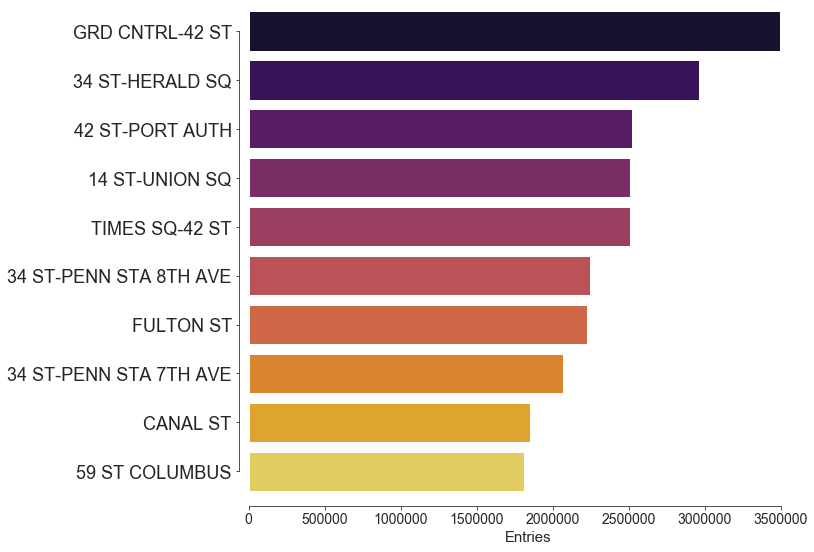

In [9]:

# plot the mean daily entries for the top 10 stations 
sns.barplot(sum_daily_top10['MEAN_DAILY_ENTRIES'],
            sum_daily_top10['STATION'],palette=('inferno'))
fig=plt.gcf()
fig.set_size_inches(10,9)
plt.title('')
plt.xlabel("Entries", fontsize = 15)
plt.ylabel("", fontsize = 15)
sns.despine(offset=10, trim=True)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 18)
plt.show()


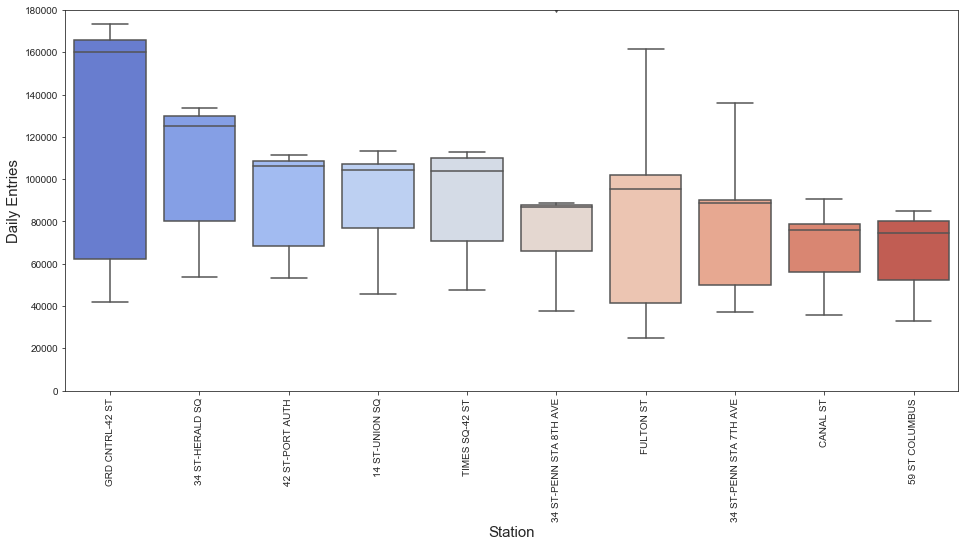

In [10]:

# plot boxplots of the daily entries of the top 10 stations
sns.boxplot('STATION', 'DAILY_ENTRIES', data=stations_daily_top10,palette='coolwarm', 
            order=sum_daily_top10['STATION'])
fig=plt.gcf()
fig.set_size_inches(16,7)
plt.title('')
plt.xlabel("Station", fontsize = 15)
plt.ylabel("Daily Entries", fontsize = 15)
plt.xticks(rotation=90)
plt.ylim(0,180000)
plt.show()


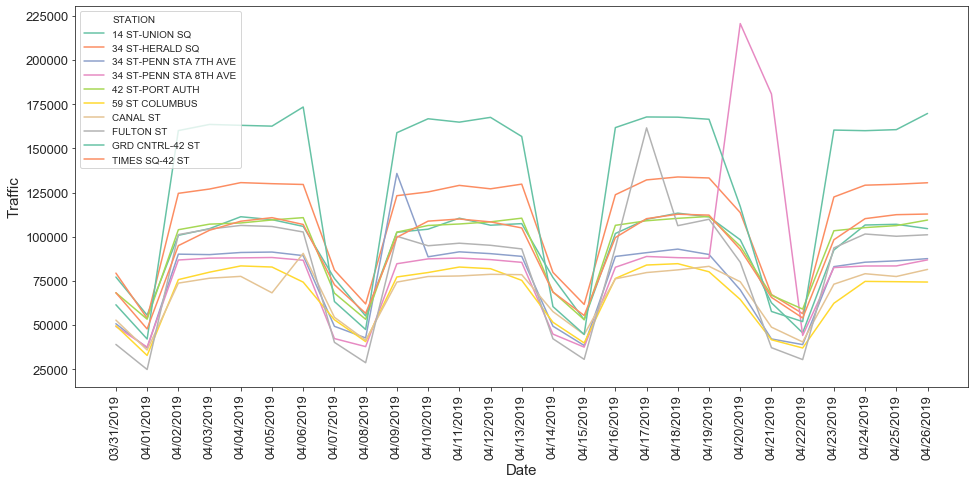

In [11]:

# plot the daily entries of the top 10 stations over the timeframe
ax = sns.lineplot(x="DATE", y="DAILY_ENTRIES", hue="STATION", palette = 'Set2', data = stations_daily_top10)
plt.xticks(rotation=90, fontsize = 13)
plt.yticks(rotation=0, fontsize = 13)
fig = plt.gcf()
fig.set_size_inches(16,7)
plt.title('')
plt.xlabel("Date", fontsize = 15)
plt.ylabel("Traffic", fontsize = 15)
plt.show()


# 4 HOURS

In [12]:

# # remove rows with time's not every 4 hours
# turnstiles_df = turnstiles_df.loc[(turnstiles_df['TIME'] == dt.time(0, 0)) | (turnstiles_df['TIME'] == dt.time(4, 0)) | 
#                   (turnstiles_df['TIME'] == dt.time(8, 0)) | (turnstiles_df['TIME'] == dt.time(12, 0)) | 
#                   (turnstiles_df['TIME'] == dt.time(16, 0)) | (turnstiles_df['TIME'] == dt.time(20, 0))]


# turnstiles_df[turnstiles_df['STATION'] == 'GRD CNTRL-42 ST'].head()


In [13]:
turnstiles_df.loc[(turnstiles_df['TIME'] != '00:00:00') & (turnstiles_df['TIME'] != '04:00:00') & 
                  (turnstiles_df['TIME'] != '08:00:00') & (turnstiles_df['TIME'] != '12:00:00') & 
                  (turnstiles_df['TIME'] != '16:00:00') & (turnstiles_df['TIME'] != '20:00:00')].head(100)

,DATE_TIME,C/A,UNIT,SCP,STATION,DATE,TIME,ENTRIES,EXITS


## Add Entries per 4 Hours

In [14]:

# make dataframe for each turnstile per 4 hours
turnstiles_4hour = (turnstiles_df
                        .groupby(['C/A', 'UNIT', 'SCP', 'STATION', 'DATE_TIME'],as_index=False)
                        .agg({'ENTRIES':'first','EXITS':'first'}))


# add previous DATE_TIME, ENTRIES and EXITS
turnstiles_4hour[['PREV_DATE_TIME', 'PREV_ENTRIES', 'PREV_EXITS']] = (turnstiles_4hour
                                    .groupby(['C/A', 'UNIT', 'SCP', 'STATION'])['DATE_TIME', 'ENTRIES', 'EXITS']
                                    .apply(lambda grp: grp.shift(1)))


# remove rows with null previous DATE_TIME
turnstiles_4hour.dropna(subset=['PREV_DATE_TIME'], axis=0, inplace=True)


# add columns for entries per 4 hours
def get_4hour_entries(row, max_counter):
    counter = row["ENTRIES"] - row["PREV_ENTRIES"]
    if counter < 0:
        counter = -counter
    if counter > max_counter:
        counter = min(row["ENTRIES"], row["PREV_ENTRIES"])
    if counter > max_counter:
        return 0
    return counter

turnstiles_4hour["4HOUR_ENTRIES"] = turnstiles_4hour.apply(get_4hour_entries, axis=1, max_counter=30000)


# add columns for exits per 4 hours
def get_4hour_exits(row, max_counter):
    counter = row["EXITS"] - row["PREV_EXITS"]
    if counter < 0:
        counter = -counter
    if counter > max_counter:
        counter = min(row["EXITS"], row["PREV_EXITS"])
    if counter > max_counter:
        return 0
    return counter

turnstiles_4hour["4HOUR_EXITS"] = turnstiles_4hour.apply(get_4hour_exits, axis=1, max_counter=30000)


# drop unneeded columns
turnstiles_4hour = turnstiles_4hour.drop(['ENTRIES', 'EXITS', 'PREV_DATE_TIME',
                                    'PREV_ENTRIES', 'PREV_EXITS'], axis=1, errors="ignore")


turnstiles_4hour.head()

/Users/lindsayread/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  if __name__ == '__main__':


,C/A,UNIT,SCP,STATION,DATE_TIME,4HOUR_ENTRIES,4HOUR_EXITS
1,A002,R051,02-00-00,59 ST,2019-03-30 04:00:00,20.0,8.0
2,A002,R051,02-00-00,59 ST,2019-03-30 08:00:00,23.0,46.0
3,A002,R051,02-00-00,59 ST,2019-03-30 12:00:00,107.0,88.0
4,A002,R051,02-00-00,59 ST,2019-03-30 16:00:00,237.0,71.0
5,A002,R051,02-00-00,59 ST,2019-03-30 20:00:00,345.0,56.0


## Stations per 4 Hours

In [15]:

# make dataframe for each station per 4 hours
stations_4hour = (turnstiles_4hour
                        .groupby(['STATION', 'DATE_TIME'], as_index=False)
                        .agg({'4HOUR_ENTRIES':'sum','4HOUR_EXITS':'sum'}))


# add column for total traffic
stations_4hour['4HOUR_TRAFFIC'] = stations_4hour['4HOUR_ENTRIES'] + stations_4hour['4HOUR_EXITS']


stations_4hour.head()


,STATION,DATE_TIME,4HOUR_ENTRIES,4HOUR_EXITS,4HOUR_TRAFFIC
0,1 AV,2019-03-30 04:00:00,1176.0,804.0,1980.0
1,1 AV,2019-03-30 08:00:00,382.0,645.0,1027.0
2,1 AV,2019-03-30 12:00:00,1802.0,2536.0,4338.0
3,1 AV,2019-03-30 16:00:00,3666.0,4058.0,7724.0
4,1 AV,2019-03-30 20:00:00,4520.0,5296.0,9816.0


## Top 10 Stations

In [16]:

# make list of 10 stations with highest total entries over the timeframe
top10_stations = (stations_4hour.groupby(['STATION'])['4HOUR_TRAFFIC'].sum()
                   .reset_index()
                   .sort_values(by='4HOUR_TRAFFIC',ascending=False) 
                   .STATION.head(10).tolist())


## Top 10 Stations per 4 Hours

In [17]:

# make dataframe for the top 10 stations per 4 hours
stations_4hour_top10 = \
    stations_4hour[stations_4hour['STATION'].isin(top10_stations)]



# make dataframe of top 10 stations with their sum traffic per 4 hours
sum_4hour_top10 = (stations_4hour_top10.groupby(["STATION"],as_index=False)
                                        ['4HOUR_TRAFFIC']
                                        .sum()
                                        .sort_values(by='4HOUR_TRAFFIC',ascending=False))
        

sum_4hour_top10


,STATION,4HOUR_TRAFFIC
2,34 ST-PENN STA 7TH AVE,8223743.0
4,42 ST-PORT AUTH,7577654.0
6,FULTON ST,6989565.0
7,GRD CNTRL-42 ST,6945775.0
1,34 ST-HERALD SQ,5901489.0
0,14 ST-UNION SQ,5020256.0
9,TIMES SQ-42 ST,4987958.0
3,34 ST-PENN STA 8TH AVE,3920627.0
5,5 AV/53 ST,3726542.0
8,PATH NEW WTC,3660981.0


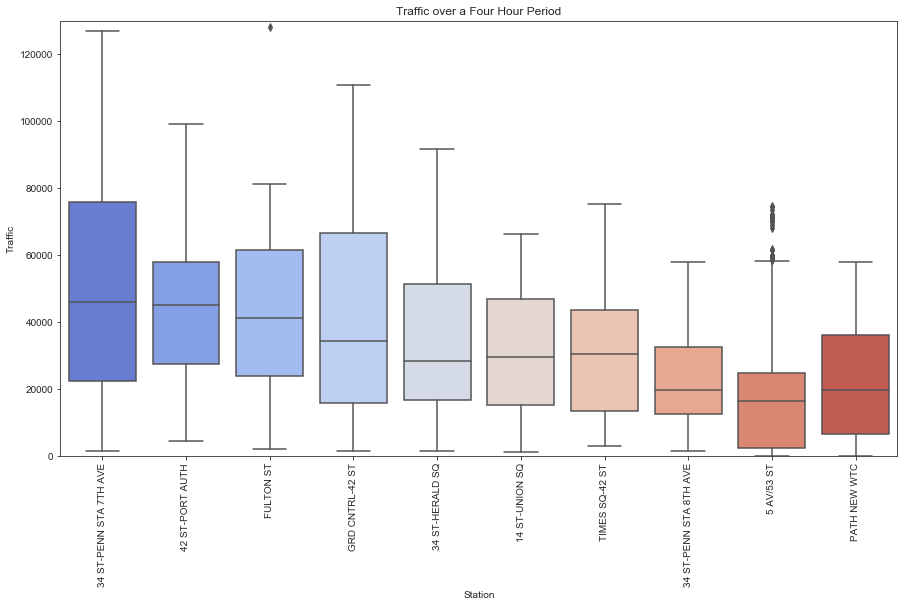

In [18]:

# plot boxplots of the 4 hour entries of the top 10 stations
sns.boxplot('STATION', '4HOUR_TRAFFIC', data=stations_4hour_top10,palette='coolwarm', 
            order=sum_4hour_top10['STATION'])
fig=plt.gcf()
fig.set_size_inches(15,8)
plt.title('Traffic over a Four Hour Period')
plt.xlabel("Station")
plt.ylabel("Traffic")
plt.xticks(rotation=90)
plt.ylim(0, 130000)
plt.show()


## Top 5 Stations per 4 Hours

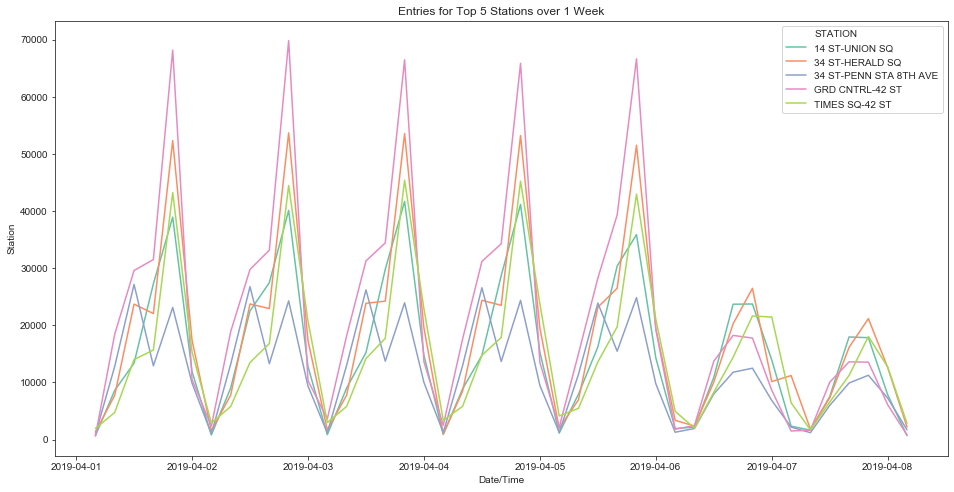

In [19]:

# make list of 5 stations with highest total entries over the timeframe
# top5_stations = (stations_4hour.groupby(['STATION'])['4HOUR_ENTRIES'].sum()
#                    .reset_index()
#                    .sort_values(by='4HOUR_ENTRIES',ascending=False) 
#                    .STATION.head(5).tolist())

top5_stations = ['GRD CNTRL-42 ST', '34 ST-HERALD SQ', '34 ST-PENN STA 8TH AVE', '14 ST-UNION SQ', 'TIMES SQ-42 ST']


# make dataframe for the top 5 stations per 4 hours over a week
stations_4hour_top5 = \
    stations_4hour[(stations_4hour['STATION'].isin(top5_stations)) 
                   & (stations_4hour['DATE_TIME'] <= '2019-04-08T04:00:00.000000000') 
                                       & (stations_4hour['DATE_TIME'] >= '2019-04-01T04:00:00.000000000')]


# plot the 4 hour entries of the top 10 stations over the timeframe
sns.lineplot(x="DATE_TIME", y="4HOUR_ENTRIES", hue="STATION", palette = 'Set2', data = stations_4hour_top5)
fig = plt.gcf()
fig.set_size_inches(16,8)
plt.title('Entries for Top 5 Stations over 1 Week')
plt.xlabel("Date/Time")
plt.ylabel("Station")
plt.show()


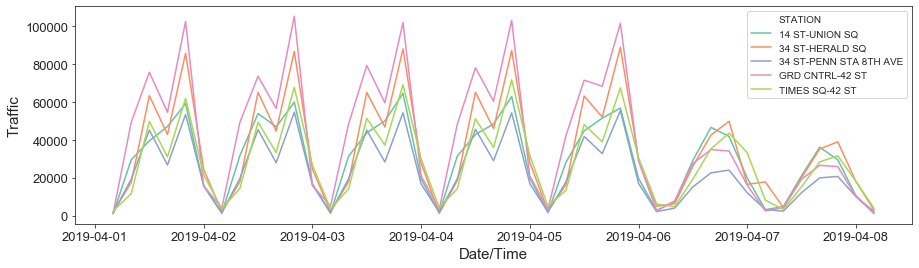

In [20]:

# plot the 4 hour entries of the top 10 stations over the timeframe
plt.figure(figsize=(15,4))
sns.lineplot(x="DATE_TIME", y="4HOUR_TRAFFIC", hue="STATION", palette = 'Set2', data = stations_4hour_top5)
plt.title('')
plt.xlabel("Date/Time", fontsize = 15)
plt.ylabel("Traffic", fontsize = 15)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.show()


## Find Top Stations Based on Weekday vs Weekend and Morning vs Evening

In [21]:

# add WEEK_DAY column
stations_4hour['WEEK_DAY'] = stations_4hour['DATE_TIME'].dt.dayofweek


stations_4hour.head()


,STATION,DATE_TIME,4HOUR_ENTRIES,4HOUR_EXITS,4HOUR_TRAFFIC,WEEK_DAY
0,1 AV,2019-03-30 04:00:00,1176.0,804.0,1980.0,5
1,1 AV,2019-03-30 08:00:00,382.0,645.0,1027.0,5
2,1 AV,2019-03-30 12:00:00,1802.0,2536.0,4338.0,5
3,1 AV,2019-03-30 16:00:00,3666.0,4058.0,7724.0,5
4,1 AV,2019-03-30 20:00:00,4520.0,5296.0,9816.0,5


In [22]:

# make dataframe for weekdays morning
stations_weekday_morning = stations_4hour.loc[(stations_4hour['WEEK_DAY'] <= 4)
                                      & ((stations_4hour['DATE_TIME'].dt.time == dt.time(8, 0))
                                                | (stations_4hour['DATE_TIME'].dt.time == dt.time(12, 0)))]


# make dataframe for weekdays afternoon
stations_weekday_afternoon = stations_4hour.loc[(stations_4hour['WEEK_DAY'] <= 4)
                                      & (stations_4hour['DATE_TIME'].dt.time == dt.time(16, 0))]


# make dataframe for weekdays evening
stations_weekday_evening = stations_4hour.loc[(stations_4hour['WEEK_DAY'] <= 4)
                                      & (stations_4hour['DATE_TIME'].dt.time == dt.time(20, 0))]


# make dataframe for weekends morning
stations_weekend_morning = stations_4hour.loc[(stations_4hour['WEEK_DAY'] >= 5)
                                      & ((stations_4hour['DATE_TIME'].dt.time == dt.time(8, 0))
                                                | (stations_4hour['DATE_TIME'].dt.time == dt.time(12, 0)))]


# make dataframe for weekends afternoon
stations_weekend_afternoon = stations_4hour.loc[(stations_4hour['WEEK_DAY'] >= 5)
                                      & (stations_4hour['DATE_TIME'].dt.time == dt.time(16, 0))]


# make dataframe for weekends evening
stations_weekend_evening = stations_4hour.loc[(stations_4hour['WEEK_DAY'] >= 5)
                                      & (stations_4hour['DATE_TIME'].dt.time == dt.time(20, 0))]


stations_weekend_evening.head()      


,STATION,DATE_TIME,4HOUR_ENTRIES,4HOUR_EXITS,4HOUR_TRAFFIC,WEEK_DAY
4,1 AV,2019-03-30 20:00:00,4520.0,5296.0,9816.0,5
10,1 AV,2019-03-31 20:00:00,3158.0,3622.0,6780.0,6
44,1 AV,2019-04-06 20:00:00,4588.0,6285.0,10873.0,5
50,1 AV,2019-04-07 20:00:00,3594.0,4293.0,7887.0,6
86,1 AV,2019-04-13 20:00:00,4348.0,5799.0,10147.0,5


In [23]:

# make dataframe of top stations with highest total entries on weekdays morning
top_weekday_morning = (stations_weekday_morning.groupby(['STATION'])['4HOUR_TRAFFIC'].mean()
                   .reset_index()
                   .sort_values(by='4HOUR_TRAFFIC',ascending=False).iloc[0:7])

top_weekday_morning


,STATION,4HOUR_TRAFFIC
244,GRD CNTRL-42 ST,59668.400
66,34 ST-HERALD SQ,40186.250
237,FULTON ST,37455.350
17,14 ST-UNION SQ,35986.125
76,42 ST-PORT AUTH,33578.950
363,TIMES SQ-42 ST,31683.000
69,34 ST-PENN STA 8TH AVE,30850.175


In [24]:

# make dataframe of top stations with highest total entries on weekdays afternoon
top_weekday_afternoon = (stations_weekday_afternoon.groupby(['STATION'])['4HOUR_TRAFFIC'].mean()
                   .reset_index()
                   .sort_values(by='4HOUR_TRAFFIC',ascending=False).iloc[0:7])

top_weekday_afternoon


,STATION,4HOUR_TRAFFIC
244,GRD CNTRL-42 ST,63060.40
17,14 ST-UNION SQ,49545.75
66,34 ST-HERALD SQ,47659.60
237,FULTON ST,38537.95
363,TIMES SQ-42 ST,37486.95
184,CANAL ST,33682.20
94,59 ST COLUMBUS,33211.65


In [25]:

# make dataframe of top stations with highest total entries on weekdays evening
top_weekday_evening = (stations_weekday_evening.groupby(['STATION'])['4HOUR_TRAFFIC'].mean()
                   .reset_index()
                   .sort_values(by='4HOUR_TRAFFIC',ascending=False).iloc[0:7])

top_weekday_evening


,STATION,4HOUR_TRAFFIC
244,GRD CNTRL-42 ST,100463.85
66,34 ST-HERALD SQ,85487.80
363,TIMES SQ-42 ST,68051.50
17,14 ST-UNION SQ,61251.90
237,FULTON ST,60042.45
76,42 ST-PORT AUTH,55068.60
68,34 ST-PENN STA 7TH AVE,53287.15


In [26]:

# make dataframe of top stations with highest total entries on weekends morning
top_weekend_morning = (stations_weekend_morning.groupby(['STATION'])['4HOUR_TRAFFIC'].mean()
                   .reset_index()
                   .sort_values(by='4HOUR_TRAFFIC',ascending=False).iloc[0:7])

top_weekend_morning


,STATION,4HOUR_TRAFFIC
17,14 ST-UNION SQ,15820.0625
244,GRD CNTRL-42 ST,14587.1250
66,34 ST-HERALD SQ,13120.3125
69,34 ST-PENN STA 8TH AVE,11853.4375
76,42 ST-PORT AUTH,11674.3750
184,CANAL ST,10804.3750
363,TIMES SQ-42 ST,10421.6875


In [27]:

# make dataframe of top stations with highest total entries on weekends afternoon
top_weekend_afternoon = (stations_weekend_afternoon.groupby(['STATION'])['4HOUR_TRAFFIC'].mean()
                   .reset_index()
                   .sort_values(by='4HOUR_TRAFFIC',ascending=False).iloc[0:7])

top_weekend_afternoon


,STATION,4HOUR_TRAFFIC
17,14 ST-UNION SQ,39298.625
66,34 ST-HERALD SQ,36143.125
244,GRD CNTRL-42 ST,31131.125
363,TIMES SQ-42 ST,30851.750
184,CANAL ST,28461.875
76,42 ST-PORT AUTH,26002.250
94,59 ST COLUMBUS,24466.125


In [28]:

# make list of top stations with highest total entries on weekends evening
top_weekend_evening = (stations_weekend_morning.groupby(['STATION'])['4HOUR_TRAFFIC'].mean()
                   .reset_index()
                   .sort_values(by='4HOUR_TRAFFIC',ascending=False).iloc[0:7])

top_weekend_evening


,STATION,4HOUR_TRAFFIC
17,14 ST-UNION SQ,15820.0625
244,GRD CNTRL-42 ST,14587.1250
66,34 ST-HERALD SQ,13120.3125
69,34 ST-PENN STA 8TH AVE,11853.4375
76,42 ST-PORT AUTH,11674.3750
184,CANAL ST,10804.3750
363,TIMES SQ-42 ST,10421.6875


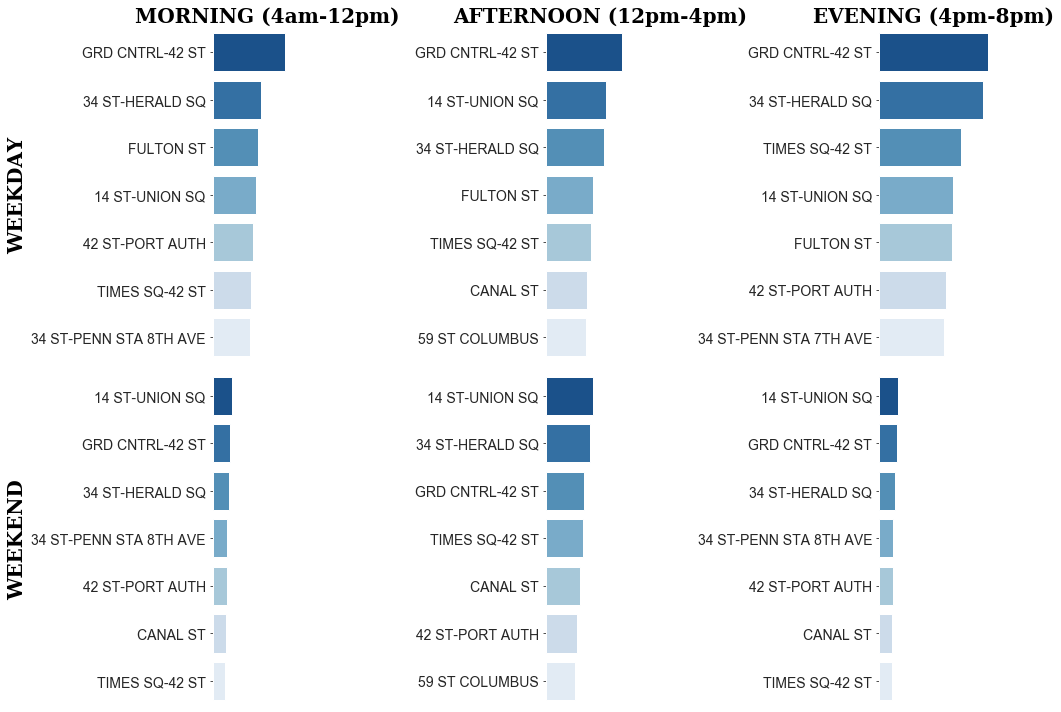

In [29]:
f = plt.figure(figsize=(14, 10))
gs = f.add_gridspec(2, 3)


font = {'family': 'serif',
        'color':  'black',
        'weight': 'bold',
        'size': 20,
        }

max_x = 90000

ax = f.add_subplot(gs[0, 0])
sns.barplot(top_weekday_morning['4HOUR_TRAFFIC'],
        top_weekday_morning['STATION'],palette=('Blues_r'))
plt.title('MORNING (4am-12pm)', fontdict=font)
plt.xlabel('')
plt.ylabel('WEEKDAY', fontdict=font)
plt.xlim(0,max_x)
plt.yticks(fontsize=14)
ax.set(xticks=[])

ax = f.add_subplot(gs[0, 1])
sns.barplot(top_weekday_afternoon['4HOUR_TRAFFIC'],
        top_weekday_afternoon['STATION'],palette=('Blues_r'))
plt.title('AFTERNOON (12pm-4pm)', fontdict=font)
plt.xlabel('')
plt.ylabel('')
plt.xlim(0,max_x)
plt.yticks(fontsize=14)
ax.set(xticks=[])

ax = f.add_subplot(gs[0, 2])
sns.barplot(top_weekday_evening['4HOUR_TRAFFIC'],
        top_weekday_evening['STATION'],palette=('Blues_r'))
plt.title('EVENING (4pm-8pm)', fontdict=font)
plt.xlabel('')
plt.ylabel('', fontdict=font)
plt.xlim(0,max_x)
plt.yticks(fontsize=14)
ax.yaxis.set_label_position("right")
ax.set(xticks=[])

ax = f.add_subplot(gs[1, 0])
sns.barplot(top_weekend_morning['4HOUR_TRAFFIC'],
        top_weekend_morning['STATION'],palette=('Blues_r'))
plt.title('')
plt.xlabel('')
plt.ylabel('WEEKEND', fontdict=font)
plt.xlim(0,max_x)
plt.yticks(fontsize=14)
ax.set(xticks=[])


ax = f.add_subplot(gs[1, 1])
sns.barplot(top_weekend_afternoon['4HOUR_TRAFFIC'],
        top_weekend_afternoon['STATION'],palette=('Blues_r'))
plt.title('', fontdict=font)
plt.xlabel('')
plt.ylabel('')
plt.xlim(0,max_x)
plt.yticks(fontsize=14)
ax.set(xticks=[])


ax = f.add_subplot(gs[1, 2])
sns.barplot(top_weekend_evening['4HOUR_TRAFFIC'],
        top_weekend_evening['STATION'],palette=('Blues_r'))
plt.title('')
plt.xlabel('')
plt.ylabel('', fontdict=font)
plt.xlim(0,max_x)
plt.yticks(fontsize=14)
ax.yaxis.set_label_position("right")
ax.set(xticks=[])


sns.despine(offset=10, trim=True, left=True, bottom = True)


plt.tight_layout()


# Graphics for Top Stations Near Universities:
    3rd Av                          6 3 AV
    Astor Place                     4 ASTOR PL
    8th St                          4 8 ST
    125th St                        4 125 ST
Union Square                    4
    14th St-Union Square            4 14 ST-UNION SQ
    Broadway-Lafayette St           4 B'WAY-LAFAYETTE
    Bleecker St                     4 BLEECKER ST
    2nd Av                          4 2 AV
    Spring St                       4 SPRING ST
    Prince St                       4 PRINCE ST
14th St                         2
18th St                         2
116th St                        2
110th St-Central Park North     2
6th Av                          2
1st Av                          2
145th St                        2
116th St-Columbia University    2
Delancey St                     2
Grand St                        2
28th St                         2
Bowery                          2
33rd St                         2
34th St                         2
Essex St                        2
23rd St                         2
Cathedral Parkway-110th St      2
West 4th St                     2
135th St                        2
137th St-City College           2

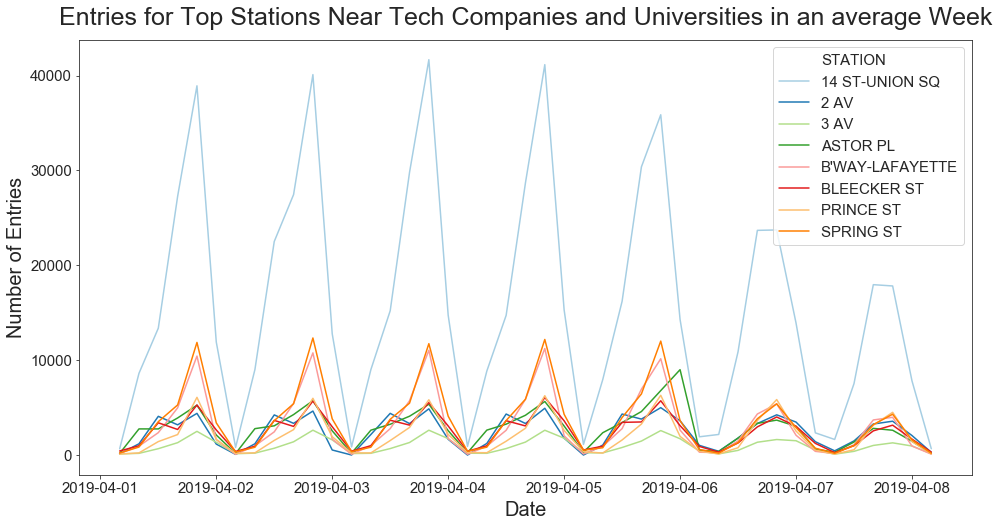

In [118]:
# make list of 5 stations with highest total entries over the timeframe
# top5_stations = (stations_4hour.groupby(['STATION'])['4HOUR_ENTRIES'].sum()
#                    .reset_index()
#                    .sort_values(by='4HOUR_ENTRIES',ascending=False) 
#                    .STATION.head(5).tolist())

top5_tech_univ = ['3 AV', 'ASTOR PL', '8 ST', '125 ST', '14 ST-UNION SQ', 'B\'WAY-LAFAYETTE', 'BLEECKER ST','2 AV','SPRING ST','PRINCE ST']


# make dataframe for the top 5 stations per 4 hours over a week
tech_univ_4hour_top5 = \
    stations_4hour[(stations_4hour['STATION'].isin(top5_tech_univ)) 
                   & (stations_4hour['DATE_TIME'] <= '2019-04-08T04:00:00.000000000') 
                                       & (stations_4hour['DATE_TIME'] >= '2019-04-01T04:00:00.000000000')]


# plot the 4 hour entries of the top 10 stations over the timeframe
sns.lineplot(x="DATE_TIME", y="4HOUR_ENTRIES", hue="STATION", palette='Paired', data = tech_univ_4hour_top5)
fig = plt.gcf()
fig.set_size_inches(16,8)
plt.title('Entries for Top Stations Near Tech Companies and Universities in an average Week',fontsize=25,pad=15)
plt.xlabel("Date",fontsize=20, labelpad=5)
plt.ylabel("Number of Entries",fontsize=20)
plt.legend(fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()
fig.savefig('tech1.png')

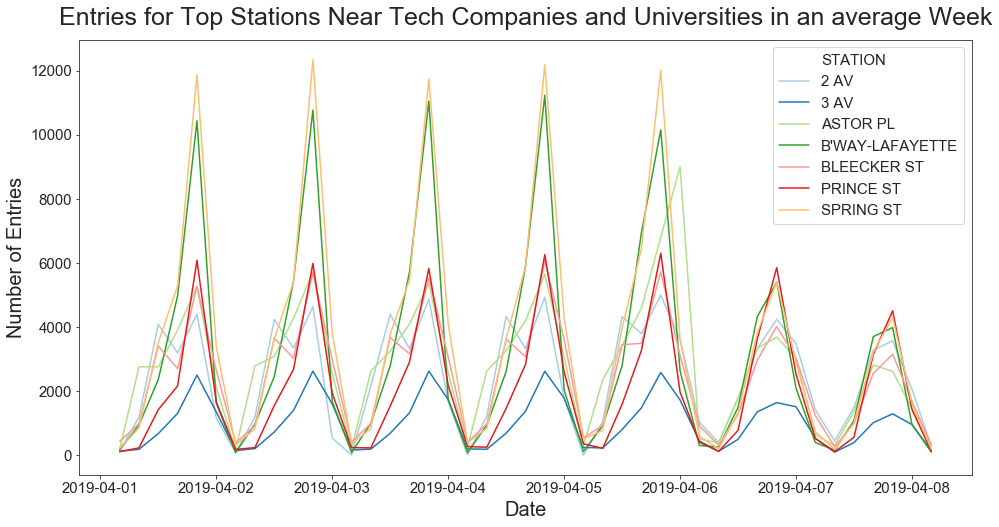

In [119]:
top5_tech_univ = ['3 AV', 'ASTOR PL', '8 ST', '125 ST', 'B\'WAY-LAFAYETTE', 'BLEECKER ST','2 AV','SPRING ST','PRINCE ST']


# make dataframe for the top 5 stations per 4 hours over a week
tech_univ_4hour_top5 = \
    stations_4hour[(stations_4hour['STATION'].isin(top5_tech_univ)) 
                   & (stations_4hour['DATE_TIME'] <= '2019-04-08T04:00:00.000000000') 
                                       & (stations_4hour['DATE_TIME'] >= '2019-04-01T04:00:00.000000000')]


# plot the 4 hour entries of the top 10 stations over the timeframe
sns.lineplot(x="DATE_TIME", y="4HOUR_ENTRIES", hue="STATION", palette='Paired', data = tech_univ_4hour_top5)
fig = plt.gcf()
fig.set_size_inches(16,8)
plt.title('Entries for Top Stations Near Tech Companies and Universities in an average Week',fontsize=25,pad=15)
plt.xlabel("Date",fontsize=20, labelpad=5)
plt.ylabel("Number of Entries",fontsize=20)
plt.legend(fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

fig.savefig('tech2.png')

In [113]:
# add TIME column
stations_4hour['TIME'] = stations_4hour['DATE_TIME'].dt.time
stations_4hour['DATE'] = stations_4hour['DATE_TIME'].dt.date
stations_4hour['DATE'].astype(str)

stations_4hour.head()

,STATION,DATE_TIME,4HOUR_ENTRIES,4HOUR_EXITS,4HOUR_TRAFFIC,WEEK_DAY,TIME,DATE
0,1 AV,2019-03-30 04:00:00,1176.0,804.0,1980.0,5,04:00:00,2019-03-30
1,1 AV,2019-03-30 08:00:00,382.0,645.0,1027.0,5,08:00:00,2019-03-30
2,1 AV,2019-03-30 12:00:00,1802.0,2536.0,4338.0,5,12:00:00,2019-03-30
3,1 AV,2019-03-30 16:00:00,3666.0,4058.0,7724.0,5,16:00:00,2019-03-30
4,1 AV,2019-03-30 20:00:00,4520.0,5296.0,9816.0,5,20:00:00,2019-03-30


In [81]:
stations_4hour.dtypes

STATION                  object
DATE_TIME        datetime64[ns]
4HOUR_ENTRIES           float64
4HOUR_EXITS             float64
4HOUR_TRAFFIC           float64
WEEK_DAY                  int64
TIME                     object
DATE                     object
dtype: object

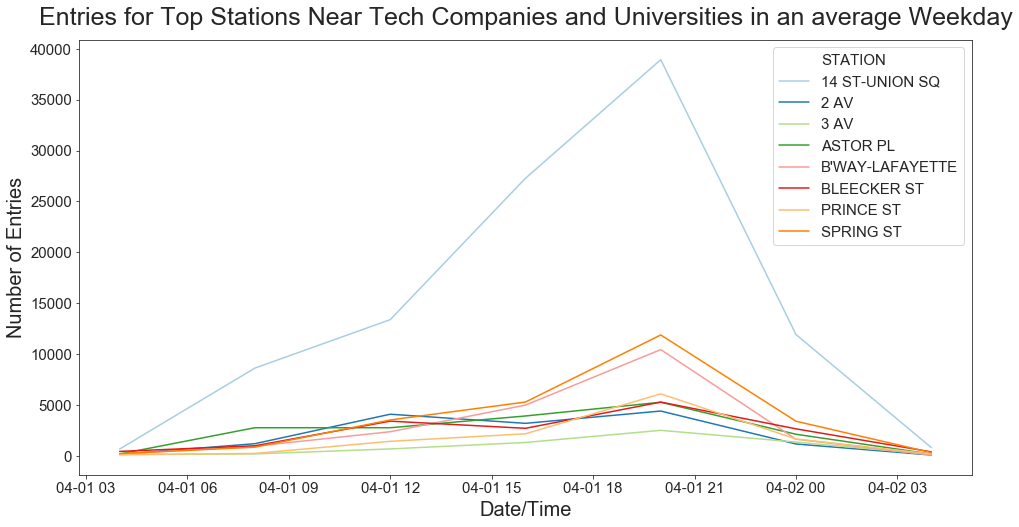

In [120]:
top5_tech_univ = ['3 AV', 'ASTOR PL', '8 ST', '125 ST', '14 ST-UNION SQ', 'B\'WAY-LAFAYETTE', 'BLEECKER ST','2 AV','SPRING ST','PRINCE ST']


# make dataframe for the top 7 stations per 4 hours over a week
tech_univ_4hour_top5 = \
    stations_4hour[(stations_4hour['STATION'].isin(top5_tech_univ)) 
                   & (stations_4hour['DATE_TIME'] <= '2019-04-02T04:00:00.000000000') 
                                       & (stations_4hour['DATE_TIME'] >= '2019-04-01T04:00:00.000000000')]


# plot the 4 hour entries of the top 7 stations over the timeframe
sns.lineplot(x="DATE_TIME", y="4HOUR_ENTRIES", hue="STATION", palette='Paired', data = tech_univ_4hour_top5)
fig = plt.gcf()
fig.set_size_inches(16,8)
plt.title('Entries for Top Stations Near Tech Companies and Universities in an average Weekday',fontsize=25,pad=15)
plt.xlabel("Date/Time",fontsize=20, labelpad=5)
plt.ylabel("Number of Entries",fontsize=20)
plt.legend(fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

fig.savefig('tech3.png')

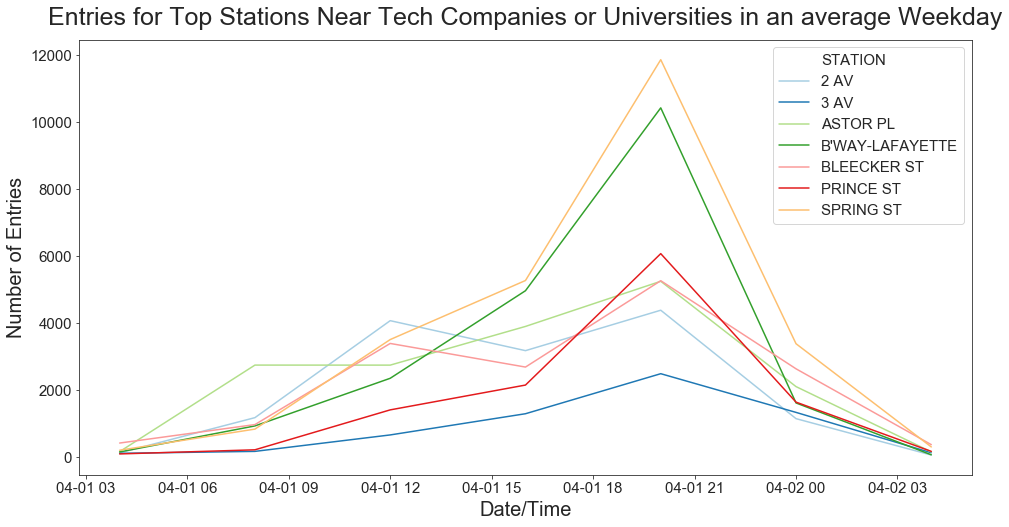

In [121]:
top5_tech_univ = ['3 AV', 'ASTOR PL', '8 ST', '125 ST', 'B\'WAY-LAFAYETTE', 'BLEECKER ST','2 AV','SPRING ST','PRINCE ST']


# make dataframe for the top 7 stations per 4 hours over a week
tech_univ_4hour_top5 = \
    stations_4hour[(stations_4hour['STATION'].isin(top5_tech_univ)) 
                   & (stations_4hour['DATE_TIME'] <= '2019-04-02T04:00:00.000000000') 
                                       & (stations_4hour['DATE_TIME'] >= '2019-04-01T04:00:00.000000000')]


# plot the 4 hour entries of the top 7 stations over the timeframe
sns.lineplot(x="DATE_TIME", y="4HOUR_ENTRIES", hue="STATION", palette='Paired', data = tech_univ_4hour_top5)
fig = plt.gcf()
fig.set_size_inches(16,8)
plt.title('Entries for Top Stations Near Tech Companies or Universities in an average Weekday',fontsize=25,pad=15)
plt.xlabel("Date/Time",fontsize=20, labelpad=5)
plt.ylabel("Number of Entries",fontsize=20)
plt.legend(fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

fig.savefig('tech4.png')

Most stations have their highest number of entries per day occur between 16:00 and 20:00.
B-WAY-LAFAYETTE and SPRING ST have the highest spikes at around 1000-1200 entries at 20:00.